In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.figure_factory import create_gantt
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.figure_factory as ff
import os, re, gc 

!pip install plotly

from io import StringIO
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/corpus-of-russian-news-articles-from-lenta/lenta-ru-news.csv


1. Given https://github.com/yutkin/Lenta.Ru-News-Dataset, perform EDA on it focusing on the following:
  - Provide descriptive statistics
  - Anomaly detection

In [2]:
def Encoder(topic):
    '''Encodes a topic into numbers'''
    
    topic_encoder = LabelEncoder()
    topic = topic_encoder.fit_transform(topic)
    return topic

In [3]:
filename = '/kaggle/input/corpus-of-russian-news-articles-from-lenta/lenta-ru-news.csv'
df = pd.read_csv(filename)
df.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,Все,1999/08/31
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,Все,1999/08/31
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,Все,1999/08/31
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,Все,1999/08/31
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,Все,1999/08/31


Some texts have parsing errors for example 'вторникпродолжались'. These words will not be meaningful after using TF-IDF.

In [4]:
df['text'][19]

'На юге Киргизии, а именно в Баткенском и Чон-Алайскомрайонах  Ошской   области  в   ночь  на  вторникпродолжались бои  между отрядами  боевиков  и  правительственнымивойсками. Как  сообщили   "Интерфаксу"  в  силовых  структурах  Ошскойобласти,  наиболее   напряженная  ситуация  складывалась  в  Чон-Алайском  районе,   в  частности,   у  сел  Кара-Теин  и  Карамык(приграничные с  Таджикистаном), где  перестрелка продолжалась  втечение 2,5 часов. По   предварительной    информации,   среди   военнослужащихправительственных сил есть легко раненые. О потерях боевиков поканичего не известно. Также сообщается,  что в  ночь на  31 августа шесть боевиковатаковали село  Сохо (в  районе киргизско-узбекской  границы).  Входе  перестрелки   с  правительственными  войсками  один  боевиксорвался в пропасть и, предположительно, погиб. Кроме того,  в одном из мест расположения  правительственных  войскзадержан  местный  житель,  который  на  допросах  сознался,  чтопомогал боевикам  собирать информа

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     800975 non-null  object
 1   title   800975 non-null  object
 2   text    800970 non-null  object
 3   topic   738973 non-null  object
 4   tags    773756 non-null  object
 5   date    800975 non-null  object
dtypes: object(6)
memory usage: 36.7+ MB


Convert object to datatime64 and round the date to the day.

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.floor('D')

We plot the number of news for each year . 

Text(0, 0.5, 'NUMBER OF NEWS ARTICLES')

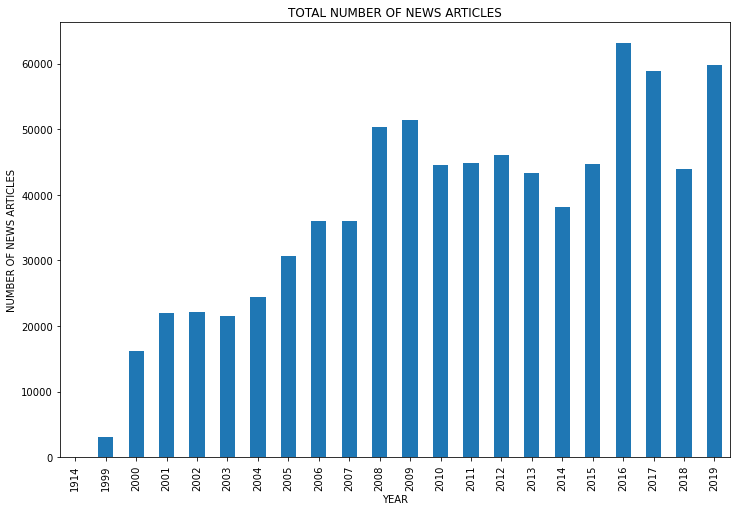

In [7]:
countNewsPerYear = df.groupby(df['date'].dt.year).size()
plt.figure(figsize=(12, 8))
fig = countNewsPerYear.plot(kind='bar')
fig.set_title('TOTAL NUMBER OF NEWS ARTICLES')
fig.set_xlabel('YEAR')
fig.set_ylabel('NUMBER OF NEWS ARTICLES')

We found something intresting in 1914 year. Let's check it by clicking on the link

In [8]:
df.loc[df['date'].dt.year == 1914]

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


That news was written in 2014. We should change the date for them.

In [9]:
df['date'][:5] = df['date'][:5] + pd.offsets.DateOffset(year=2014)

df = df.sort_values(['date'], ascending=True)
df = df.reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex



Percentages of nans for topic and text

In [10]:
amountOfNans = df.iloc[:, 2:4].isna().sum() 
amountOfNans.sort_values(ascending = False ) / df.shape[0] * 100

topic    7.740816
text     0.000624
dtype: float64

We must drop Nans in topic and text beacuse in the future, we will create a model for extracting topic from text. Without text or topic we can't train the model

In [11]:
df = df[df['topic'].notna()]
df = df[df['text'].notna()]

#refresh the indexes
df = df.set_index(np.arange(len(df.index)))

We check the appearance of topics to understand how important the topic is. Then shorter the life span of the topic than less important it is.

In [12]:
# Unique topic names
nameOfTopics = df['topic'].unique()

df_dict = []
for i in nameOfTopics:      
    serie = df[df['topic'] == i]   
    # add first, last date appearance for each topic
    df_dict.append(dict(Task=i, Start=serie.iloc[0, 5], Finish=serie.iloc[-1, 5]))
    
fig = create_gantt(df_dict, title='The date appearance of topics', height=600, bar_width=0.5, width=600)
fig.show()

del df_dict
gc.collect() 

19

We can see Медновости, Сочи, ЧМ-2014 and Библиотека are less important then others

Making a dataframe to find out how the data correlates with each other

In [13]:
dfForCorr = pd.DataFrame()

NotNaTag = df[df['tags'].notna()]

dfForCorr['length'] = NotNaTag['text'].str.len()
dfForCorr['year'] = NotNaTag['date'].dt.year
dfForCorr['month'] = NotNaTag['date'].dt.month
dfForCorr['topic'] = Encoder(NotNaTag['topic'])
dfForCorr['tag'] = Encoder(NotNaTag['tags'])


Making a heatmap

In [14]:
corrs = dfForCorr.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure

There is only a correlation between the year and the tag. Perhaps because the tags did not appear all at once, but only when the years passed. Let's check it out

In [15]:
# Unique topic names
nameOfTopics = NotNaTag['tags'].unique()

df_dict = []
for i in nameOfTopics:      
    serie = NotNaTag[NotNaTag['tags'] == i]   
    # add first, last date appearance for each topic
    df_dict.append(dict(Task=i, Start=serie.iloc[0, 5], Finish=serie.iloc[-1, 5]))
    
fig = create_gantt(df_dict, title='The date appearance of tags', height=1000, bar_width=0.5, width=800)
fig.show()

del df_dict, dfForCorr, NotNaTag
gc.collect() 

741

As expected, the tags did not appear at the same time

We plot the number of news for each tag

Text(0, 0.5, 'NUMBER OF NEWS ARTICLES')

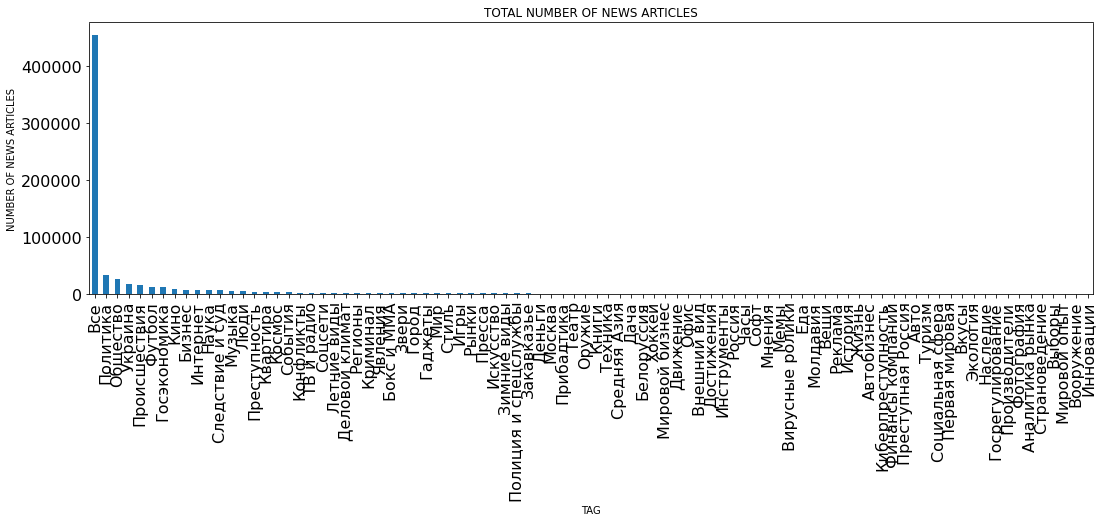

In [16]:
countNewsPerTag = df.groupby(df['tags']).size()
countNewsPerTag = countNewsPerTag.sort_values(ascending = False)

plt.figure(figsize=(18, 5))
plt.tick_params(axis='both', which='major', labelsize=16)
fig = countNewsPerTag.plot(kind='bar')
fig.set_title('TOTAL NUMBER OF NEWS ARTICLES')
fig.set_xlabel('TAG')
fig.set_ylabel('NUMBER OF NEWS ARTICLES')

'Все' has the highest frequency

Now we plot the number of news for each topic. Then more number of topics than more important the topic is

Text(0, 0.5, 'NUMBER OF NEWS ARTICLES')

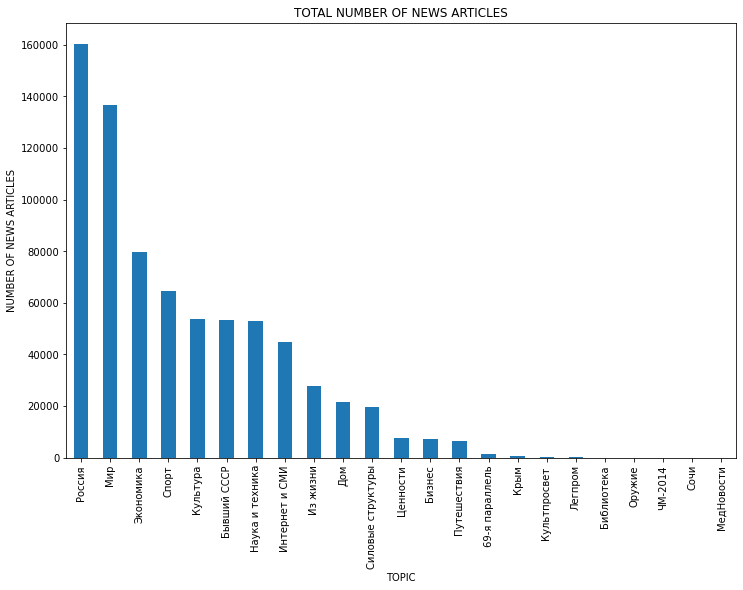

In [17]:
countNewsPerTopic = df.groupby(df['topic']).size()
countNewsPerTopic = countNewsPerTopic.sort_values(ascending = False)

plt.figure(figsize=(12, 8))
fig = countNewsPerTopic.plot(kind='bar')
fig.set_title('TOTAL NUMBER OF NEWS ARTICLES')
fig.set_xlabel('TOPIC')
fig.set_ylabel('NUMBER OF NEWS ARTICLES')

How we can see the dataset is unbalanced and some topics seems nearly zero. We need to check how many percent of rare topics is in the entire dataset. We need to know this, because in the future we will create a model for extracting the topic from the text.Then a larger number of topics, than greater the chance that the model may make mistakes

In [18]:
rareTopics = ['Крым','Культпросвет ', 'Легпром', 'Библиотека', 'Оружие', 'ЧМ-2014', 'Сочи', 'МедНовости', '69-я параллель'] 
percOfRareTopic = sum((df['topic'].isin(rareTopics)))/ len(df['topic']) * 100

print(f'{percOfRareTopic:.3f}% for rare topics')

0.333% for rare topics


In [19]:
mask = np.logical_not(df['topic'].isin(rareTopics))
df = df[mask]


del mask
gc.collect() 

867

Refresh the indexes and remove url, date and length from the dataset

In [21]:
df = df.set_index(np.arange(len(df.index)))
df = df.drop(['url', 'date'], axis = 1) 

Save the dataframe

In [ ]:
#df.to_csv('textFromEDA.csv', index = False)